In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [19]:
df = pd.read_csv('prices.csv')
df.head()

,Dist Code,Year,State Code,State Name,Dist Name,RICE,PADDY,WHEAT,SORGHUM,PEARL MILLET,...,BARLEY,CHICKPEA,PIGEONPEA,GROUNDNUT,SEASMUM,RAPE AND MUSTARD,CASTOR,LINSEED,SUGARCANE GUR,COTTON KAPAS
0,1,1990,14,Chhattisgarh,Durg,382.0,230.0,329.0,-1.0,-1.0,...,-1.0,602.0,858.0,-1.0,1014.0,-1.0,-1.0,978.0,-1.0,-1.0
1,1,1991,14,Chhattisgarh,Durg,453.0,221.0,384.0,-1.0,-1.0,...,-1.0,641.0,822.0,-1.0,1750.0,-1.0,-1.0,1053.0,-1.0,-1.0
2,1,1992,14,Chhattisgarh,Durg,497.0,-1.0,448.0,-1.0,-1.0,...,-1.0,728.0,992.0,-1.0,1407.0,-1.0,-1.0,903.0,-1.0,-1.0
3,1,1993,14,Chhattisgarh,Durg,533.0,321.0,463.0,-1.0,-1.0,...,-1.0,986.0,908.0,-1.0,1325.0,-1.0,-1.0,1009.0,-1.0,-1.0
4,1,1994,14,Chhattisgarh,Durg,580.0,349.0,491.0,-1.0,-1.0,...,-1.0,842.0,1268.0,-1.0,2750.0,-1.0,-1.0,1134.0,-1.0,-1.0


In [23]:
columns = ['city','crop']
columns.extend([str(i) for i in range(1990,2017)])
dtypes=np.dtype(list(map(lambda x: (x,float), columns)))
df2 = pd.DataFrame(np.empty(0,dtype=dtypes))
df2[['city','crop']]=df2[['city','crop']].astype(str)

In [24]:
crops=["RICE","PADDY","WHEAT","SORGHUM","PEARL MILLET","MAIZE","FINGER MILLET","BARLEY","CHICKPEA","PIGEONPEA","GROUNDNUT","SEASMUM","RAPE AND MUSTARD","CASTOR","LINSEED","SUGARCANE GUR","COTTON KAPAS"]
cities=set()
for index,data in df.iterrows():
    cities.add(data['Dist Name'])
print(len(cities))

533


In [5]:
for city in cities:
    for crop in crops:
        df2=df2.append({'city':city, 'crop':crop}, ignore_index=True)

In [6]:
df2.head()

,city,crop,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Wayanad,RICE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wayanad,PADDY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Wayanad,WHEAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wayanad,SORGHUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wayanad,PEARL MILLET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
cnt=0
for index, row in df.iterrows():
    for crop in crops:
        cnt+=1
        print(f'\r{cnt}',end='')
        idx = df2.index[(df2['city']==row['Dist Name']) & (df2['crop']==crop)].tolist();
        df2.at[idx[0], row['Year']]=row[crop]

209474

In [9]:
df2.head()

,city,crop,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Wayanad,RICE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,Wayanad,PADDY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,691.0,852.0,955.0,1118.0,909.0,1495.0,1504.0,1506.0,1369.0,1714.0
2,Wayanad,WHEAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,Wayanad,SORGHUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,Wayanad,PEARL MILLET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [11]:
df2.dtypes

city     object
crop     object
1990    float64
1991    float64
1992    float64
1993    float64
1994    float64
1995    float64
1996    float64
1997    float64
1998    float64
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
1990    float64
1991    float64
1992    float64
1993    float64
1994    float64
1995    float64
1996    float64
1997    float64
1998    float64
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
dtype: object

In [14]:
df2=df2.dropna(1,how='all')

In [15]:
df2.shape

(9061, 29)

In [41]:
df3=df2.replace(-1,numpy.NaN).dropna(0,thresh=15)

In [53]:
df3.drop(df3[numpy.isnan(df3[2016])].index,inplace=True)

In [55]:
df3.to_csv('test.csv')

In [54]:
df3[2016]

1       1714.0
18      1102.0
19      1453.0
22      1075.0
25      3472.0
         ...  
9046    1604.0
9047    1490.0
9049    1480.0
9052    7433.0
9056    3348.0
Name: 2016, Length: 2381, dtype: float64

In [56]:
df3.shape

(2381, 29)

In [2]:
df4 = pd.read_csv('test.csv')

In [3]:
df4=df4.fillna(df4.mean())

In [4]:
train_x, train_y = [], []
for index, data in df4.iterrows():
    train_x.append(data.tolist()[3:-1])
    train_y.append(data['2016'])
train_x = np.array(train_x)
train_y = np.array(train_y)
train_x = train_x / 25000
train_y = train_y / 25000
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
train_y = np.reshape(train_y, (train_y.shape[0], 1))
print(train_x.shape, train_y.shape)
print('train_x :',train_x[0])
print('train_y :',train_y[0])

(2381, 26, 1) (2381, 1)
train_x : [[0.01104]
 [0.01468]
 [0.01584]
 [0.0158 ]
 [0.0194 ]
 [0.02068]
 [0.02268]
 [0.0208 ]
 [0.02536]
 [0.02704]
 [0.0246 ]
 [0.02136]
 [0.02512]
 [0.02716]
 [0.02632]
 [0.0222 ]
 [0.04744]
 [0.02764]
 [0.03408]
 [0.0382 ]
 [0.04472]
 [0.03636]
 [0.0598 ]
 [0.06016]
 [0.06024]
 [0.05476]]
train_y : [0.06856]


In [5]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [6]:
model = Sequential()

model.add(LSTM(units=128, return_sequences = True, input_shape = (train_x.shape[1], 1)))

model.add(LSTM(units=128, return_sequences = True))

model.add(LSTM(units=128, return_sequences = True))

model.add(LSTM(units=128))

model.add(Dense(units = 1))

In [7]:
model.compile( optimizer = 'adam', loss = 'mean_squared_error')

model.fit(train_x, train_y, epochs = 10, batch_size = 32)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmp938n9y0y.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmp938n9y0y.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
75/75 [==============================] - 43s 82ms/step - loss: 0.0066
Epoch 2/10
75/75 [==============================] - 7s 91ms/step - loss: 0.0019
Epoch 3/10
75/75 [==============================] - 7s 96ms/step - loss: 0.0023
Epoch 4/10
75/75 [==============================] - 7s 97ms/step - loss: 0.0019
Epoch 5/10
75/75 [==============================] - 7s 97ms/step - loss: 0.

In [10]:
predicted = model.predict(np.reshape(train_x,(train_x.shape[0],26,1)))

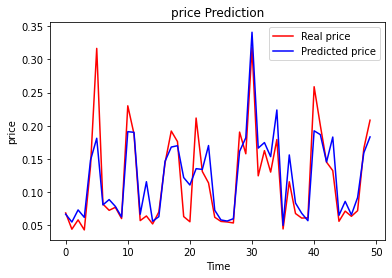

In [12]:
# Visualising the results
plt.plot(train_y[:50], color = 'red', label = 'Real price')
plt.plot(predicted[:50], color = 'blue', label = 'Predicted price')
plt.title('price Prediction')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()


In [16]:
new_train_x = train_x
predicted = train_y
for i in range(2017,2022):
    for i in range(len(new_train_x)):
        for j in range(len(new_train_x[i])-1):
            new_train_x[i][j][0]=new_train_x[i][j+1][0]
        new_train_x[i][25]=predicted[i]
    predicted = model.predict(np.reshape(new_train_x,(new_train_x.shape[0],26,1)))

In [17]:
predicted

array([[0.09966309],
       [0.09242076],
       [0.09773719],
       ...,
       [0.1631167 ],
       [0.22478083],
       [0.19723988]], dtype=float32)

In [18]:
import json

In [39]:
data = {}
for city in cities:
    data[city]={}
for i in range(len(predicted)):
    data[df4.at[i,'city']][df4.at[i,'crop']]=predicted[i][0]*25000

In [41]:
with open('data.json','w') as outfile:
    json.dump(data, outfile, indent=2)